**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Brian Dinh
- Candy Zhang
- Edwin Liang
- Sindhu Kothe
- Vaishnavi Ramanujan

# Research Question

What is the relationship between the rate of diabetes and individual-specific body conditions? Would lifestyle choices such as smoking, drinking, and an unhealthy diet affect the risk of diabetes? What are the effects of income on the rate of diabetes? 

## Background and Prior Work

Diabetes is an autoimmune disorder that affects an overwhelming number of people in the United States. For this reason, it is paramount that we be able to predict whether or not an individual is at risk of developing diabetes given a set amount of information. 

We found that there is prior research<a name="diabetes-rate"></a>[<sup>1</sup>](#dia-rate) exploring the mortality rate in people with type 2 diabetes. From this, we can see that the mortality rate of people with type 2 diabetes has been increasing as they grow older. The research paper in this reference talks about predicting 5 year mortality rates for people with a higher age with diabetes. This would help predict if an immediate intervention is required. We also discovered that there is a clear correlation between diabetes and gender. According to one study <a name="diabetes-gender"></a>[<sup>2</sup>](#dia-gender), the population of older people that were diagnosed with diabetes is overwhelmingly male. On the other hand,lower risk populations that were studied show an overwhelming female bias. However, we see that when the population with diabetes amongst the younger age groups were studied, there was a pretty even split between both the sexes.

Furthermore, we see that there is in fact a correlation between substances usage and the risk of diabetes. According to one study by the NCBI <a name="diabetes-smoke"></a>[<sup>3</sup>](#dia-smoke) (National Center for Biotechnology Information), we see that men who smoked around 25 cigarettes daily were at greater risk of diabetes. Also, men who drank 30.0 - 49.9 grams of alcohol had a higher relative risk of diabetes. However, the study was conducted on only male professionals in the age range of 40 - 75. We also see that the study is relatively old and we don't know how the correlation plays out in today's world. There has also been some research done on the relationship between socioeconomic status including education and income level on diabetes that we hope to further build on with our project. This research<a name="diabetes-income"></a>[<sup>4</sup>](#dia-income) shows that there is a strong correlation between income and type 2 diabetes in Canada and we would like to do research primarily based in the United States. We hope to address the gaps we found in these studies and conduct a more representative anaylsis covering both eating habits and socieconomic conditions.  

1. <a name="dia-rate"></a> [^](#diabetes-rate) *Journal of Diabetes Research*. https://www.hindawi.com/journals/jdr/2024/1741878/
2. <a name="dia-gender"></a> [^](#diabetes-gender) *Diabetologia Journal*. https://link.springer.com/article/10.1007/s001250051573
3. <a name="dia-smoke"></a> [^](#diabetes-smoke) *National Center for Biotechnology Information*. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2548937/
4. <a name="dia-income"></a> [^](#diabetes-income) *National Center for Biotechnology Information*. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4603875/

# Hypothesis


We expect that a person who smokes, drinks, and has unhealthy eating habits is more likely to be diagnosed with diabetes. We also think there is a correlation between having a lower income and having less access to healthy food. Essentially, we believe that healthy lifestyle choices and socioeconomic equality play important roles in reducing the prevalence of diabetes and its associated risk factors. We expect income inequalities and unhealthy food and lifestyle choices to increase an individual’s risk of developing diabetes. Additionally, proper nutrition and reduced intake of alcohol / smoking will lower the rate of diabetes.

# Data

## Data overview

For each dataset include the following information
- Dataset #1
  - Dataset Name:
  - Link to the dataset:
  - Number of observations:
  - Number of variables:
- Dataset #2 (if you have more than one!)
  - Dataset Name:
  - Link to the dataset:
  - Number of observations:
  - Number of variables:
- etc

Now write 2 - 5 sentences describing each dataset here. Include a short description of the important variables in the dataset; what the metrics and datatypes are, what concepts they may be proxies for. Include information about how you would need to wrangle/clean/preprocess the dataset

If you plan to use multiple datasets, add a few sentences about how you plan to combine these datasets.


Our ideal dataset should include individual-specific body condition variables, as well as whether a person smokes / drinks, their eating habits, and income level. The dataset should ideally contain a large number of observations, preferably thousands, to ensure statistical power and generalizability of findings across one specific group of people. Data can be collected from various sources including hospitals, clinics, medical research institutions, and population-based studies. It is essential to ensure that the data collection process is systematic and standardized to minimize bias and ensure reliability. The dataset should be representative of the population and not skewed towards any demographic. A potential dataset would be https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset as this contains all the variables we do need and more. However, we may need to search for more datasets regarding lifestyle choices and health conditions to further support our hypothesis. 

## Dataset #1: Diabetes Health Indicators Dataset
- Dataset Name: Diabetes Health Indicators Dataset
  - Link to dataset: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset
  - Number of observations: 253,680
  - Number of variables: 22
  - Description of important variables:
    - BloodPressure: To express the Blood pressure measurement
    - Heavy Alcohol Consumption: 0 = no heavy alcohol consumption, 1 = heavy alcohol consumption
    - Smoker: 0 = non-smoker, 1 = smoker
    - Insulin: To express the Insulin level in blood
    - BMI: To express the Body mass index
    - Diabetes: If the individual has diabetes, 0 = no diabetes, 1 = prediabetes,  2 = has diabetes
    - Income: On a scale 1-8 1 = less than 10,000 usd a year 5 = less than 35,000 usd per year 8 = 75,000 usd or more per year 
    - Fruits / Veggies: 1 =  consumption of fruits and vegetables at least once per day, 0 = no fruits or veggies
    - Sex: 0 = male, 1 = female
  - Description of Dataset:
    Because all of the important variables and other columns contain only numeric values, we will not need a significant amount of pre-processing for the data. However, for the diabetes column, we plan to merge the prediabetes and the no diabetes column since our goal is to have a binary output on whether a patient has diabetes or not. Additionally, we will also merge the fruits and vegetables columns so that we can further streamline the input variables. The food and veggies column is a proxy for healthy eating and blood pressure, insulin, and heart disease are proxies for individual-specific body conditions.  Because there are no missing values, we would just need to look through the dataset and see if there are outliers, as well as normalize for gender. Because this is a general health survey, we also need to remove unnecessary variables such as if a person has health care or not, difficulty walking up and down stairs, and state of mental health. We plan to merge the two datasets  we have by the diabetes column, as both datasets include whether or not an individual has diabetes.  

In [24]:
import pandas as pd
import numpy as np
diabetes_df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
#We only want to observe the important variables because otherwise it'd be too much analysis
important_vars = ['Age', 'HighBP', 'HvyAlcoholConsump', 'Smoker',
                 'BMI', 'Income', 'Fruits', 'Veggies', 'Sex', 'Diabetes_012']
diabetes_df = diabetes_df[important_vars]
diabetes_df_cleaned = diabetes_df.dropna()
diabetes_df_cleaned

,Age,HighBP,HvyAlcoholConsump,Smoker,BMI,Income,Fruits,Veggies,Sex,Diabetes_012
0,9.0,1.0,0.0,1.0,40.0,3.0,0.0,1.0,0.0,0.0
1,7.0,0.0,0.0,1.0,25.0,1.0,0.0,0.0,0.0,0.0
2,9.0,1.0,0.0,0.0,28.0,8.0,1.0,0.0,0.0,0.0
3,11.0,1.0,0.0,0.0,27.0,6.0,1.0,1.0,0.0,0.0
4,11.0,1.0,0.0,0.0,24.0,4.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
253675,5.0,1.0,0.0,0.0,45.0,7.0,1.0,1.0,1.0,0.0
253676,11.0,1.0,0.0,0.0,18.0,4.0,0.0,0.0,0.0,2.0
253677,2.0,0.0,0.0,0.0,28.0,2.0,1.0,0.0,0.0,0.0
253678,7.0,1.0,0.0,0.0,23.0,1.0,1.0,1.0,1.0,0.0


## Dataset #2: Food Enviroment Atlas Dataset

- Dataset Name: Food Enviroment Atlas
    - Link to the dataset: https://www.ers.usda.gov/data-products/food-environment-atlas/data-access-and-documentation-downloads/
    - Number of observations: 102
    - Number of variables: 4
    - Description of Important Variables:
        - State: List of the US States
        - Variables: Variables names specifiying whether mean is describing income or diabetes rate
        - mean: average of either income or diabetes rate
Important Variables: 
Description of the dataset: This dataset has data regarding nutrition and nutrition assistance programs and the circumstances of those receiving assistance. There were many more variables in the Variables column but unecessary for our analysis so they were removed. This leaves us with just two variables tha are useful to our analysis being median income and diabetes rate. 


In [2]:
# ## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
# ## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION 

df2 = pd.read_csv("StateAndCountyData.csv")
df2 = df2[(df2["Variable_Code"] == "MEDHHINC15") | (df2["Variable_Code"] == "PCT_DIABETES_ADULTS13")]
df2 = df2.drop(columns = ["FIPS", "County"])
df2 = df2.groupby(["State", "Variable_Code"])["Value"].agg(["sum", "mean"]).reset_index()
df2["Variable_Code"] = df2["Variable_Code"].replace("MEDHHINC15", "median_income")
df2["Variable_Code"] = df2["Variable_Code"].replace("PCT_DIABETES_ADULTS13", "diabetes_rate")
df2 = df2.rename(columns = {"Variable_Code": "Variables"})
df2 = df2.drop(columns = ["sum"])
df2

,State,Variables,mean
0,AK,median_income,61646.178571
1,AK,diabetes_rate,7.017241
2,AL,median_income,39830.104478
3,AL,diabetes_rate,15.489552
4,AR,median_income,38592.680000
...,...,...,...
97,WI,diabetes_rate,9.706944
98,WV,median_income,40523.309091
99,WV,diabetes_rate,13.943636
100,WY,median_income,59936.478261


# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

### Section 1 of EDA - Dataset 1

In [25]:
# Get means, medians, and spread
statistics = diabetes_df_cleaned.describe()
statistics

,Age,HighBP,HvyAlcoholConsump,Smoker,BMI,Income,Fruits,Veggies,Sex,Diabetes_012
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,8.032119,0.429001,0.056197,0.443169,28.382364,6.053875,0.634256,0.811420,0.440342,0.296921
std,3.054220,0.494934,0.230302,0.496761,6.608694,2.071148,0.481639,0.391175,0.496429,0.698160
min,1.000000,0.000000,0.000000,0.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,0.000000,24.000000,5.000000,0.000000,1.000000,0.000000,0.000000
50%,8.000000,0.000000,0.000000,0.000000,27.000000,7.000000,1.000000,1.000000,0.000000,0.000000
75%,10.000000,1.000000,0.000000,1.000000,31.000000,8.000000,1.000000,1.000000,1.000000,0.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,8.000000,1.000000,1.000000,1.000000,2.000000


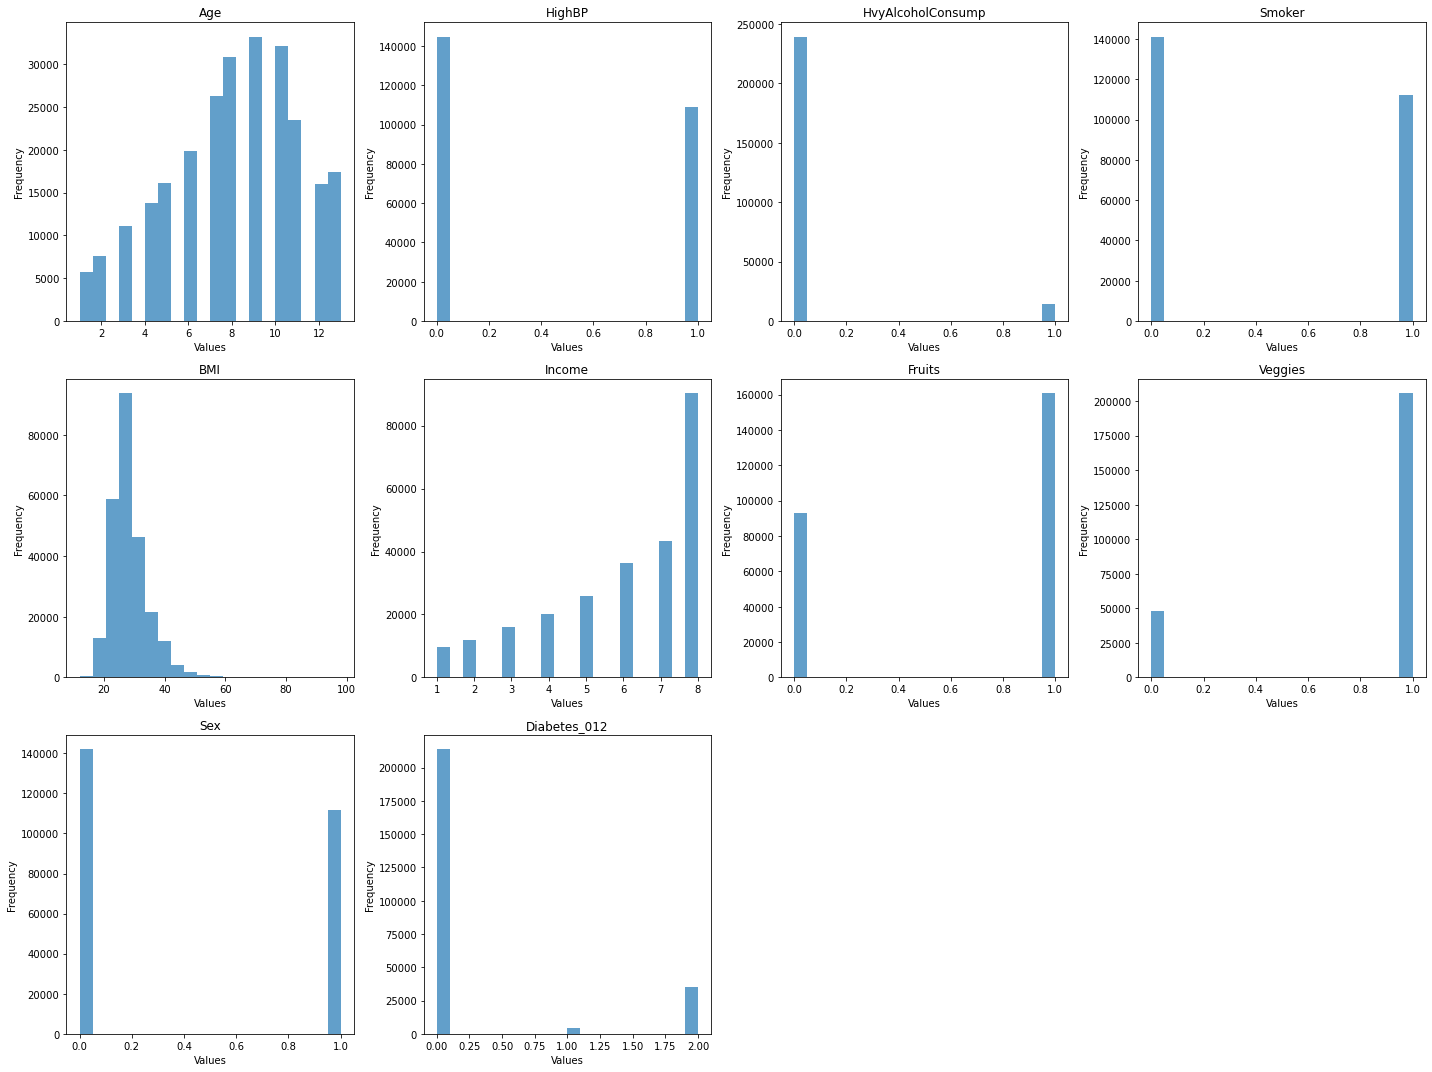

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Calculate the number of rows and columns based on the number of columns in the DataFrame
num_columns = len(diabetes_df_cleaned.columns)
num_rows = math.ceil(num_columns / 4)  # Assuming 4 plots per row

# Create subplots for each variable
fig, axs = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, 5 * num_rows))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate through each column and plot the histogram
for i, column in enumerate(diabetes_df_cleaned.columns):
    axs[i].hist(diabetes_df_cleaned[column], bins=20, alpha=0.7)
    axs[i].set_title(column)
    axs[i].set_xlabel('Values')
    axs[i].set_ylabel('Frequency')

# Hide the remaining empty subplots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

In [27]:
#Rename Diabetes_012 and combined Diabetes_012 values for sake of consistency
diabetes_df_cleaned = diabetes_df_cleaned.rename(columns = {"Diabetes_012": "Diabetes_01"})
diabetes_df_cleaned["Diabetes_01"].replace(2, 1, inplace = True)

/tmp/ipykernel_43181/1113214988.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_df_cleaned["Diabetes_01"].replace(2, 1, inplace = True)


In [28]:
diabetes_df_cleaned.describe()

,Age,HighBP,HvyAlcoholConsump,Smoker,BMI,Income,Fruits,Veggies,Sex,Diabetes_01
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,8.032119,0.429001,0.056197,0.443169,28.382364,6.053875,0.634256,0.811420,0.440342,0.157588
std,3.054220,0.494934,0.230302,0.496761,6.608694,2.071148,0.481639,0.391175,0.496429,0.364355
min,1.000000,0.000000,0.000000,0.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,0.000000,24.000000,5.000000,0.000000,1.000000,0.000000,0.000000
50%,8.000000,0.000000,0.000000,0.000000,27.000000,7.000000,1.000000,1.000000,0.000000,0.000000
75%,10.000000,1.000000,0.000000,1.000000,31.000000,8.000000,1.000000,1.000000,1.000000,0.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,8.000000,1.000000,1.000000,1.000000,1.000000


Scatterplot for BMI vs. Blood Pressure with Diabetes as Hue:

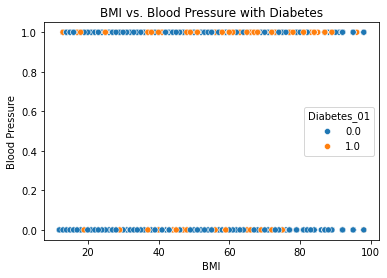

In [29]:
sns.scatterplot(data=diabetes_df_cleaned, x='BMI', y='HighBP', hue='Diabetes_01')
plt.title('BMI vs. Blood Pressure with Diabetes')
plt.xlabel('BMI')
plt.ylabel('Blood Pressure')
plt.show()
#TODO: is this necessary?

Barplot for Blood Pressure vs Diabetes Rate:

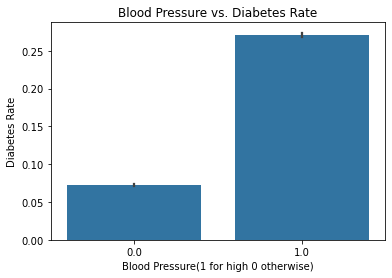

In [60]:
sns.barplot(data=diabetes_df_cleaned, x='HighBP', y='Diabetes_01')
plt.title('Blood Pressure vs. Diabetes Rate')
plt.xlabel('Blood Pressure(1 for high 0 otherwise)')
plt.ylabel('Diabetes Rate')
plt.show()

Barplot for Heavy Alcohol Consumption vs. Diabetes Rate:

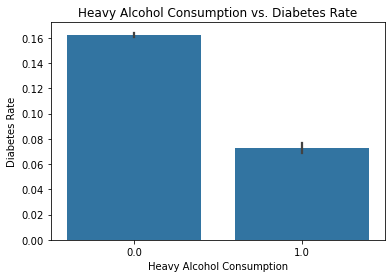

In [30]:
sns.barplot(data=diabetes_df_cleaned, x='HvyAlcoholConsump', y='Diabetes_01')
plt.title('Heavy Alcohol Consumption vs. Diabetes Rate')
plt.xlabel('Heavy Alcohol Consumption')
plt.ylabel('Diabetes Rate')
plt.show()

Barplot for Smoking vs. Diabetes Rate:

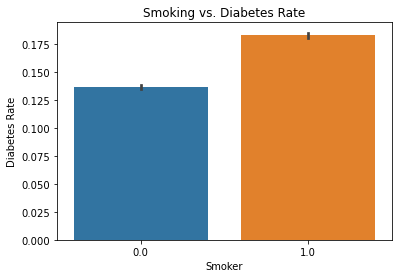

In [22]:
sns.barplot(data=diabetes_df_cleaned, x='Smoker', y='Diabetes_01')
plt.title('Smoking vs. Diabetes Rate')
plt.xlabel('Smoker')
plt.ylabel('Diabetes Rate')
plt.show()

Barplot for Fruits Consumption vs. Diabetes Rate:

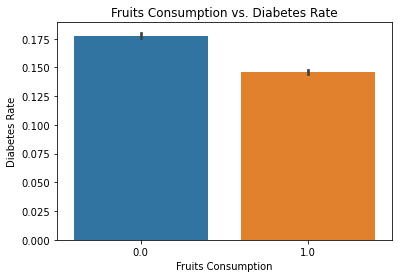

In [23]:
sns.barplot(data=diabetes_df_cleaned, x='Fruits', y='Diabetes_01')
plt.title('Fruits Consumption vs. Diabetes Rate')
plt.xlabel('Fruits Consumption')
plt.ylabel('Diabetes Rate')
plt.show()

Barplot for Veggies Consumption vs. Diabetes Rate

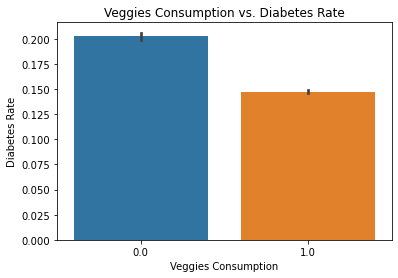

In [24]:
sns.barplot(data=diabetes_df_cleaned, x='Veggies', y='Diabetes_01')
plt.title('Veggies Consumption vs. Diabetes Rate')
plt.xlabel('Veggies Consumption')
plt.ylabel('Diabetes Rate')
plt.show()

## Removing Outliers

We want to get rid of outliers regarding each variable. We could get rid of outliers overall(i.e. we remove a row if one of the variables has an outlier), but that would remove a great chunk of this dataset(253k samples to 85k samples). So it's just better to clean out outliers in respect to each variable and have series for more data.

In [49]:
age_no_outliers = diabetes_df_cleaned[['Age', 'Diabetes_01']]
Q1 = age_no_outliers['Age'].quantile(0.25)
Q3 = age_no_outliers['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_no_outliers = age_no_outliers[(age_no_outliers['Age'] >= lower_bound) & (age_no_outliers['Age'] <= upper_bound)]
age_no_outliers = age_no_outliers

bmi_no_outliers = diabetes_df_cleaned[['BMI', 'Diabetes_01']]
Q1 = bmi_no_outliers['BMI'].quantile(0.25)
Q3 = bmi_no_outliers['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
bmi_no_outliers = bmi_no_outliers[(bmi_no_outliers['BMI'] >= lower_bound) & (bmi_no_outliers['BMI'] <= upper_bound)]
bmi_no_outliers = bmi_no_outliers
bmi_no_outliers

income_no_outliers = diabetes_df_cleaned[['Income', 'Diabetes_01']]
Q1 = income_no_outliers['Income'].quantile(0.25)
Q3 = income_no_outliers['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
income_no_outliers = income_no_outliers[(income_no_outliers['Income'] >= lower_bound) & (income_no_outliers['Income'] <= upper_bound)]
income_no_outliers = income_no_outliers

## Analyzing quantitative variables with no outliers

Now that we've gotten rid of outliers we should analyze the quantitative variables by plotting the box plots comparing the quantitative variables for diabetic and non-diabetic samples. We will also analyze the central tendencies and spread values of diabetic and non-diabetic samples for each quantitative variable. Let's start off with age:

**Age**

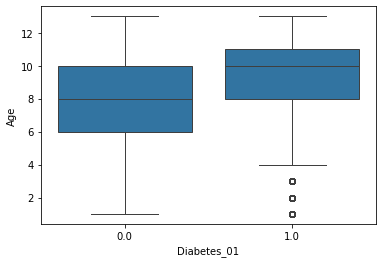

In [50]:
sns.boxplot(data=age_no_outliers, y='Age', x='Diabetes_01')
plt.show()

In [59]:
age_no_outliers[age_no_outliers['Diabetes_01'] == 0].describe()

,Age,Diabetes_01
count,213703.000000,213703.0
mean,7.786559,0.0
std,3.104942,0.0
min,1.000000,0.0
25%,6.000000,0.0
50%,8.000000,0.0
75%,10.000000,0.0
max,13.000000,0.0


In [57]:
age_no_outliers[age_no_outliers['Diabetes_01'] == 1].describe()

,Age,Diabetes_01
count,39977.000000,39977.0
mean,9.344798,1.0
std,2.369167,0.0
min,1.000000,1.0
25%,8.000000,1.0
50%,10.000000,1.0
75%,11.000000,1.0
max,13.000000,1.0


It seems that diabetic samples are typically older by some amount. We also notice that for non-diabetic samples, the range of ages is more diverse, noticeable by the fact that both the IQR and standard deviation is higher, indicating higher spread. This makes sense since most people in this dataset are not diabetic, so we expect a more diverse range of values. However, diabetic people seem to be centralized at older ages and there aren't a lot of diabetic samples that are young. All of this indicates a positive correlation between Age and BMI. This can be due to certain factors such as older people being less healthier, meaning that older people are more likely to have diabetes.

**BMI**

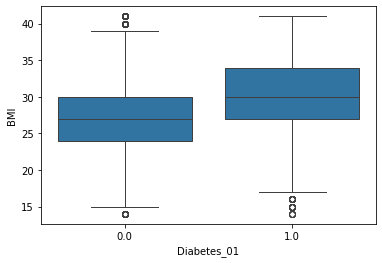

In [48]:
sns.boxplot(data=bmi_no_outliers, y='BMI', x='Diabetes_01')
plt.show()

In [54]:
bmi_no_outliers[bmi_no_outliers['Diabetes_01'] == 0].describe()

,BMI,Diabetes_01
count,207514.000000,207514.0
mean,27.109458,0.0
std,4.804836,0.0
min,14.000000,0.0
25%,24.000000,0.0
50%,27.000000,0.0
75%,30.000000,0.0
max,41.000000,0.0


In [55]:
bmi_no_outliers[bmi_no_outliers['Diabetes_01'] == 1].describe()

,BMI,Diabetes_01
count,36319.000000,36319.0
mean,30.197968,1.0
std,5.046686,0.0
min,14.000000,1.0
25%,27.000000,1.0
50%,30.000000,1.0
75%,34.000000,1.0
max,41.000000,1.0


Observing the box plots, it seems like the only major difference is that the central tendency BMI of the diabetic patients is higher. The mean and median BMI of the diabetic patients are both higher. The spread seems relatively the same, with diabetic patients having a slightly higher spread. This supports our hypothesis that higher BMI typically correlates with a higher likeliness for diabetes. It may possibly be a factor in causing diabetes as well

**Income**

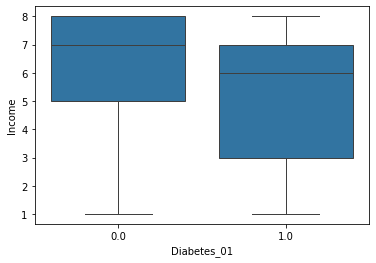

In [61]:
sns.boxplot(data=income_no_outliers, y='Income', x='Diabetes_01')
plt.show()

In [62]:
income_no_outliers[income_no_outliers['Diabetes_01'] == 0].describe()

,Income,Diabetes_01
count,213703.000000,213703.0
mean,6.208663,0.0
std,2.005203,0.0
min,1.000000,0.0
25%,5.000000,0.0
50%,7.000000,0.0
75%,8.000000,0.0
max,8.000000,0.0


In [63]:
income_no_outliers[income_no_outliers['Diabetes_01'] == 1].describe()

,Income,Diabetes_01
count,39977.000000,39977.0
mean,5.226430,1.0
std,2.216756,0.0
min,1.000000,1.0
25%,3.000000,1.0
50%,6.000000,1.0
75%,7.000000,1.0
max,8.000000,1.0


The mean and median income of non-diabetic patients is certainly higher, which is what we expect due to richer people having better access to healthcare and better access to healthier food. This seems to state that there is a negative correlation between income and likeliness of diabetes. In addition, it seems like the spread of income in diabetic patients is higher as seen by the higher IQR. This spread is due to the fact that there are many samples that have an income lower than that of the median. This is possibly due to the fact that most diabetic samples have an income close to the mean or median, but due to the worse living conditions of poorer people, there are many poorer diabetic patients that cause the spread to be large.

## Correlations between the quantitative variables

It's helpful to learn the correlations between the quantitative variables to learn their relationships and to check for confounding. If two independent variables correlate with each other, but both correlate with the likelihood of diabetes in some way, one of them may be a confounding variable.
TODO: better explanations

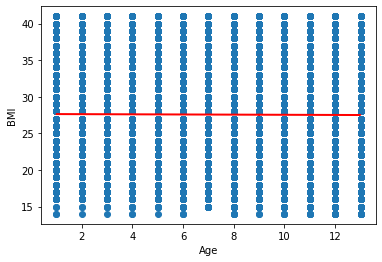

In [13]:
age_bmi_df = diabetes_df_cleaned[['Age', 'BMI']]
Q1 = age_bmi_df.quantile(0.25)
Q3 = age_bmi_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Remove outliers
age_bmi_df = age_bmi_df[(age_bmi_df >= lower_bound) & (age_bmi_df <= upper_bound)]
age_bmi_df = age_bmi_df.dropna()

x = age_bmi_df['Age']
y = age_bmi_df['BMI']
plt.scatter(x,y)
plt.xlabel('Age')
plt.ylabel('BMI')
b1, b0 = np.polyfit(np.array(x), np.array(y), 1)
plt.plot(np.array(x), b1 * np.array(x) + b0, color='r')
plt.show()

There seems to be no correlation between Age and BMI

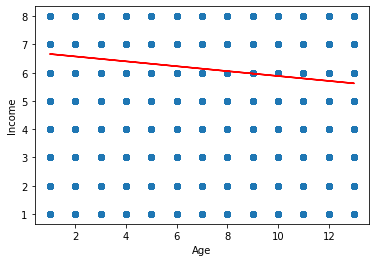

In [14]:
df = diabetes_df_cleaned[['Age', 'Income']]
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Remove outliers
df = df[(df >= lower_bound) & (df <= upper_bound)]
df = df.dropna()

x = df['Age']
y = df['Income']
plt.scatter(x,y)
plt.xlabel('Age')
plt.ylabel('Income')
b1, b0 = np.polyfit(np.array(x), np.array(y), 1)
plt.plot(np.array(x), b1 * np.array(x) + b0, color='r')
plt.show()

There seems to be some negative correlation between age and income? Perhaps this can be explained with retirement as people get older

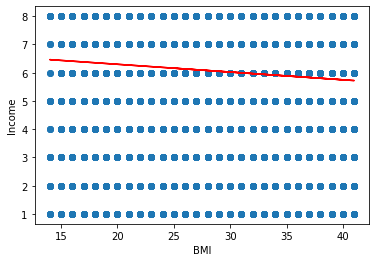

In [15]:
df = diabetes_df_cleaned[['BMI', 'Income']]
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Remove outliers
df = df[(df >= lower_bound) & (df <= upper_bound)]
df = df.dropna()

x = df['BMI']
y = df['Income']
plt.scatter(x,y)
plt.xlabel('BMI')
plt.ylabel('Income')
b1, b0 = np.polyfit(np.array(x), np.array(y), 1)
plt.plot(np.array(x), b1 * np.array(x) + b0, color='r')
plt.show()

There is a negative correlation between Income and BMI. This is kind of expected, as those with lower income may be forced to live under unhealthier conditions.

## T-tests for quantitative variables

TODO: actually we may not want to use this. With a huge population size, even the smallest deviations result in super high t-scores. Are there any alternative hypothesis tests we can use? Maybe a test of equivalence?

In [89]:
from scipy.stats import ttest_ind

In [98]:
group0 = age_no_outliers[age_no_outliers['Diabetes_01'] == 0]
group1 = age_no_outliers[age_no_outliers['Diabetes_01'] == 1]
ttest_ind(np.array(group0['Age']), np.array(group1['Age']))

Ttest_indResult(statistic=-95.28764155284031, pvalue=0.0)

In [79]:
group0 = bmi_no_outliers[bmi_no_outliers['Diabetes_01'] == 0]
group1 = bmi_no_outliers[bmi_no_outliers['Diabetes_01'] == 1]
ttest_ind(group0['BMI'], group1['BMI'])

Ttest_indResult(statistic=-112.15079480217672, pvalue=0.0)

In [80]:
group0 = income_no_outliers[income_no_outliers['Diabetes_01'] == 0]
group1 = income_no_outliers[income_no_outliers['Diabetes_01'] == 1]
ttest_ind(group0['Income'], group1['Income'])

Ttest_indResult(statistic=88.35930903453513, pvalue=0.0)

## Hypothesis Testing for qualitative variables

TODO:

## Identifying Confounding

TODO: 

### Section 2 of EDA - Dataset 2
Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [16]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
# Get means, medians, and spread


# Ethics & Privacy

- Thoughtful discussion of ethical concerns included
- Ethical concerns consider the whole data science process (question asked, data collected, data being used, the bias in data, analysis, post-analysis, etc.)
- How your group handled bias/ethical concerns clearly described

Acknowledge and address any ethics & privacy related issues of your question(s), proposed dataset(s), and/or analyses. Use the information provided in lecture to guide your group discussion and thinking. If you need further guidance, check out [Deon's Ethics Checklist](http://deon.drivendata.org/#data-science-ethics-checklist). In particular:

- Are there any biases/privacy/terms of use issues with the data you propsed?
- Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis? (For example, does your data exclude particular populations, or is it likely to reflect particular human biases in a way that could be a problem?)
- How will you set out to detect these specific biases before, during, and after/when communicating your analysis?
- Are there any other issues related to your topic area, data, and/or analyses that are potentially problematic in terms of data privacy and equitable impact?
- How will you handle issues you identified?


There are some ethical concerns regarding equitability we must consider. There may be variations between diabetes rates between gender and ages below 21. There are also some claims that there are some differences between diabetes rates between ethnicities(such as this:<a name="diabetes-ethnicity"></a>[<sup>1</sup>](#dia-ethnicity)). It’s not clear why this correlation is reported, but it’s possibly something to consider when searching for a dataset. Certain disabilities can also have an impact on diabetes rate and ideally we’d want a dataset that accounts for those disabilities too. It’s also ideal to consider a dataset that contains a diverse set of class and wealth levels too, as poorer people may be forced to live in worse living conditions that may cause a higher risk of diabetes. Therefore, it’s important to sample a diverse set of people in our dataset to account for some or all of these differences, if possible. We can check for such datasets either by looking at the description of the dataset and gauge how diverse the dataset is based off of that, or checking if age, gender, ethnicity, disabilities, and class are variables in the dataset and doing EDA to make sure the distribution of those variables are diverse. If we cannot find data that accounts for all of these differences, then we must add disclaimers stating so in order to prevent misinterpretation.

Even if we have a diverse dataset, though, there may still be some issues with equitability. If we don’t have enough variables in the dataset, we can get some correlations that lead us to identify false causes and false conclusions. For example, let’s say we exclude BMI for the sake of this scenario. Certain population groups may just so happen to have higher BMIs on average for a variety of reasons. BMI could be the actual reason why they typically have a higher risk for diabetes, but if we excluded BMI, we may falsely conclude that they naturally are more likely to suffer from diabetes, which can be problematic. False conclusions can lead to treatments that can be harmful to people or groups. To solve this, we would have to consider datasets that have many different diverse variables. Lastly, with an ideal dataset that considers all of these problems, the only major issue would be privacy. We wouldn’t want hospitals to release sensitive information from patients without their knowledge or proper consent, for instance. It has to be sourced from willing participants.

1. <a name="dia-ethnicity"></a> [^](#diabetes-ethnicity) *Diabetes UK*. https://www.diabetes.org.uk/diabetes-the-basics/types-of-diabetes/type-2/diabetes-ethnicity

# Team Expectations 

* *Agree to a weekly meeting time to discuss overall team progress and next steps*
* *Communicate in advance if you are unable to finish your weekly tasks for any reasons or come to the meetings*
* *Try your best to contribute during meetings and ensure work is evenly divided*
* *Teammates will also help create an environment that everyone is comfortable voicing their opinions in and will use their skills / knowledge to help each other*
* *Be open to giving and receiving feedback to/from other team members*
* *Make sure to fill in the peer evaluations honestly*

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 2/4  |  6:00 PM | Determined means of Communication  | Discuss about questions and answers regarding previous project review| 
| 2/9  |  4:00 PM |  Individually think about questions about project proposal | Discuss research question, Browse and select datasets | 
| 2/10  | 4:00 PM  | Finish project proposal | Discuss and finalize project proposal   |
| 2/23  | 5:00 PM  | Review Feedback on Project Proposal | Decide on Fixes for Project Proposal; Discuss New Datasets   |
| 2/25  | 3:00 PM  | Start Fixes on Project Proposal, Continue looking for datasets | Finalize Fixes for Project Proposal, Finalize Datasets to use and Finalize Data Checkpoint
| 3/08  | 5:00 PM  | Finalize wrangling/EDA; Begin Analysis (Diabetes Statisics)| Discuss/edit Analysis; Discuss group understanding of data and analysis methods |
| 3/12  | 6:00 PM  | Complete analysis; Draft results/conclusion/discussion | Discuss and correct analysis  |
| 3/20  | Before 11:59 PM  | NA | Turn in Final Project & Group Project Surveys |